# 60 years of art at a glance 

## Limpieza y visualización de datos
Proyecto final de bootcamp Ironhack  
Madrid, octubre 2020

### Importando bibliotecas

In [1]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input/MoMAExhibitions1929to1989.csv', encoding='latin-1')
pd.options.display.max_columns = 0

In [3]:
df.head(5)

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ExhibitionRoleinPressRelease,ConstituentID,ConstituentType,DisplayName,AlphaSort,FirstName,MiddleName,LastName,Suffix,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Curator,Director,9168.0,Individual,"Alfred H. Barr, Jr.",Barr Alfred H. Jr.,Alfred,H.,Barr,Jr.,NaN,American,1902.0,1981.0,"American, 19021981",Male,109252853.0,Q711362,500241556.0,moma.org/artists/9168
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,1053.0,Individual,Paul Cézanne,Cézanne Paul,Paul,NaN,Cézanne,NaN,NaN,French,1839.0,1906.0,"French, 18391906",Male,39374836.0,Q35548,500004793.0,moma.org/artists/1053
2,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2098.0,Individual,Paul Gauguin,Gauguin Paul,Paul,NaN,Gauguin,NaN,NaN,French,1848.0,1903.0,"French, 18481903",Male,27064953.0,Q37693,500011421.0,moma.org/artists/2098
3,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2206.0,Individual,Vincent van Gogh,Gogh Vincent van,Vincent,NaN,van Gogh,NaN,NaN,Dutch,1853.0,1890.0,"Dutch, 18531890",Male,9854560.0,Q5582,500115588.0,moma.org/artists/2206
4,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,5358.0,Individual,Georges-Pierre Seurat,Seurat Georges-Pierre,Georges-Pierre,NaN,Seurat,NaN,NaN,French,1859.0,1891.0,"French, 18591891",Male,24608076.0,Q34013,500008873.0,moma.org/artists/5358


In [4]:
df.shape

(34558, 28)

## Identificación del volumen de valores nulos

In [5]:
df.isna().sum()

ExhibitionID                      429
ExhibitionNumber                    0
ExhibitionTitle                     0
ExhibitionCitationDate              1
ExhibitionBeginDate                 0
ExhibitionEndDate                1204
ExhibitionSortOrder                 0
ExhibitionURL                     433
ExhibitionRole                    134
ExhibitionRoleinPressRelease      134
ConstituentID                     514
ConstituentType                   134
DisplayName                       134
AlphaSort                         134
FirstName                        3059
MiddleName                      30754
LastName                         2560
Suffix                          34401
Institution                     32100
Nationality                      8486
ConstituentBeginDate             9268
ConstituentEndDate              14739
ArtistBio                        8469
Gender                           8762
VIAFID                           7562
WikidataID                      12317
ULANID      

## Análisis del tipo de valores por columna

In [6]:
df.dtypes

ExhibitionID                    float64
ExhibitionNumber                 object
ExhibitionTitle                  object
ExhibitionCitationDate           object
ExhibitionBeginDate              object
ExhibitionEndDate                object
ExhibitionSortOrder             float64
ExhibitionURL                    object
ExhibitionRole                   object
ExhibitionRoleinPressRelease     object
ConstituentID                   float64
ConstituentType                  object
DisplayName                      object
AlphaSort                        object
FirstName                        object
MiddleName                       object
LastName                         object
Suffix                           object
Institution                      object
Nationality                      object
ConstituentBeginDate            float64
ConstituentEndDate              float64
ArtistBio                        object
Gender                           object
VIAFID                          float64


## Análisis de "ExhibitionTitle", "ExhibitionID" & "DisplayName"

El número de títulos debería de coincidir con el mismo número de ID.
Encontramos que hay más ID que exposiciones. 

In [7]:
df["ExhibitionTitle"].nunique()

1666

In [8]:
df["ExhibitionBeginDate"].nunique()

1523

In [9]:
df["ExhibitionID"].nunique()

1727

In [10]:
df["ExhibitionCitationDate"].nunique()

1785

In [11]:
df["DisplayName"].nunique()

11605

## Análisis de la columna del género de los artistas

En esta columna encontramos 8762 valores nulos que clasificaremos como unknown.  
El resto se clasifican adecuadamente en Female or Male.

In [12]:
df["Gender"].value_counts()

Male      23268
Female     2527
male          1
Name: Gender, dtype: int64

In [13]:
# Conversión de los resultados de la columna a minúscula para que puedan ser tratados

df["Gender"] = df.Gender.astype(str).str.lower() 

In [14]:
df["Gender"].value_counts()

male      23269
nan        8762
female     2527
Name: Gender, dtype: int64

## Nacionalidad: procedencia de los artistas  

Al analizar los países de procedencia de los artistas en la columna "Nationality" encontramos que los datos han de ser transformados para ser representados geográficamente.  
La idea es importar un diccionario y realizar una función "lookup" para actualizarlos.
https://github.com/knowitall/chunkedextractor/blob/master/src/main/resources/edu/knowitall/chunkedextractor/demonyms.csv

In [15]:
# Importación de csv y conversión a diccionario

import csv
reader = csv.reader(open('input/demonyms.csv', 'r'))
demonyms_dict = {}
for row in reader:
   k, v = row
   demonyms_dict[k] = v
    
    
#print(demonyms_dict)

In [16]:
type(demonyms_dict)

dict

In [17]:
print(demonyms_dict.get("Villermosino")) 

Villahermosa


In [18]:
# Función de consulta de nacionalidades y extracción de país

def countryextractor(string):
    
    for key,value in demonyms_dict.items():
        if string == key:
            return value

In [19]:
# Validación del comportamiento de la función

countryextractor('Spanish')

'Spain'

Ahora es necesario extraer los países relativos a las nacionalidades en una columna nueva del dataset.  
Para ello creamos una función que iterará por las diferente keys del diccionario que contiene los gentilicios y devolverá el país correspondiente.

In [30]:
df['Country'] = df['Nationality'].apply(countryextractor)
df.head(5)

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ExhibitionRoleinPressRelease,ConstituentID,ConstituentType,DisplayName,AlphaSort,FirstName,MiddleName,LastName,Suffix,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL,Country
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Curator,Director,9168.0,Individual,"Alfred H. Barr, Jr.",Barr Alfred H. Jr.,Alfred,H.,Barr,Jr.,NaN,American,1902.0,1981.0,"American, 19021981",male,109252853.0,Q711362,500241556.0,moma.org/artists/9168,United States
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,1053.0,Individual,Paul Cézanne,Cézanne Paul,Paul,NaN,Cézanne,NaN,NaN,French,1839.0,1906.0,"French, 18391906",male,39374836.0,Q35548,500004793.0,moma.org/artists/1053,France
2,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2098.0,Individual,Paul Gauguin,Gauguin Paul,Paul,NaN,Gauguin,NaN,NaN,French,1848.0,1903.0,"French, 18481903",male,27064953.0,Q37693,500011421.0,moma.org/artists/2098,France
3,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2206.0,Individual,Vincent van Gogh,Gogh Vincent van,Vincent,NaN,van Gogh,NaN,NaN,Dutch,1853.0,1890.0,"Dutch, 18531890",male,9854560.0,Q5582,500115588.0,moma.org/artists/2206,Netherlands
4,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,5358.0,Individual,Georges-Pierre Seurat,Seurat Georges-Pierre,Georges-Pierre,NaN,Seurat,NaN,NaN,French,1859.0,1891.0,"French, 18591891",male,24608076.0,Q34013,500008873.0,moma.org/artists/5358,France


## Análisis de datos numéricos

Al analizar cómo se comportan las categorías numéricas en los gráficos 

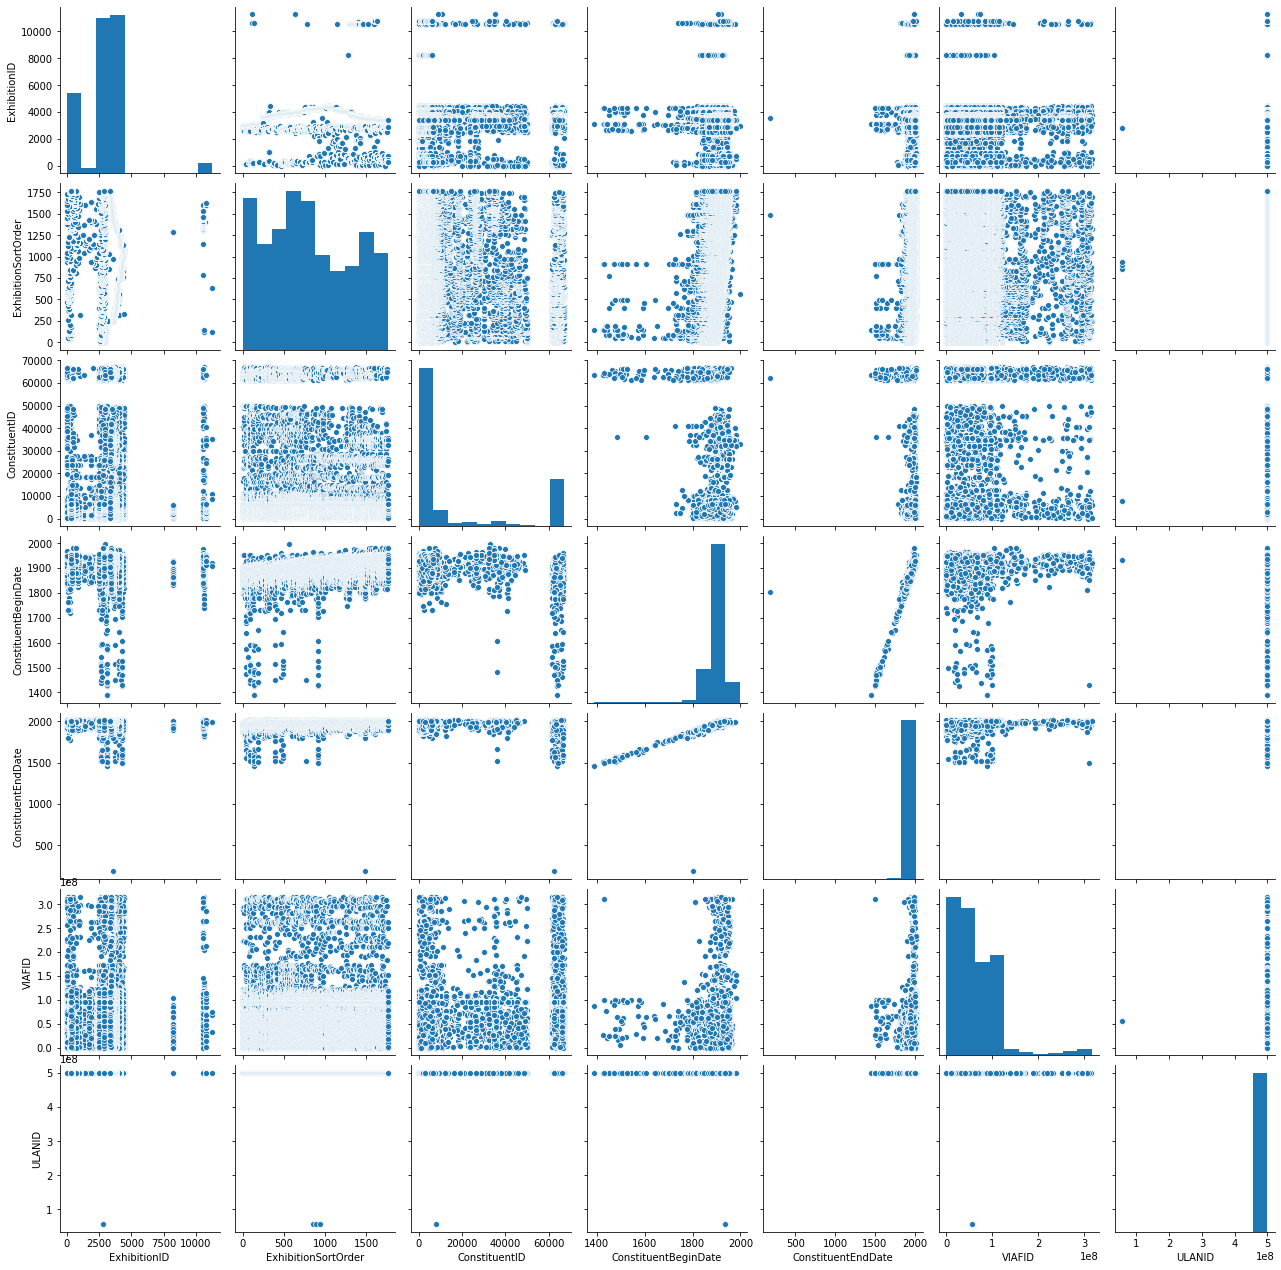

In [27]:
sns.pairplot(df)

## Análisis de "ExhibitionCitationDate"

La idea inicial era extraer las fechas de inicio y fin de las exposiciones de la columna "ExhibitionCitationDate", puesto que no contemplaba valores nulos y la información estaba completa.
Durante el análisis, encontramos que las fechas contenidas no seguían un sólo patrón, por lo que decidí prescindir de estos datos y centrarme en "ExhibitionBeginDate" y "ExhibitionEndDate".

In [ ]:
df_final["ExhibitionCitationDate"].str.strip # elimino espacios para empezar a limpiar las columna
df_final

In [ ]:
df_final['ExhibitionCitationDate'] = df_final['ExhibitionCitationDate'].str.replace('[MoMA Exh. #', ' ', regex=False) #elimino "[MoMA Exh. #"df_final
df_final

In [ ]:
df_final['ExhibitionCitationDate'] = df_final['ExhibitionCitationDate'].str.replace(']', ' ', regex=False)
df_final #elimino "]"

In [ ]:
df_final["ExhibitionCitationDate"].str.strip #elimino espacios después de prescindir de caracteres innecesarios
df_final.head(5)

In [ ]:
df_final['ExhibitionCitationDate'].str.replace(r'(^\d,)', '', regex=True)
df_final

In [ ]:
df_final['ExhibitionCitationDate'].dtypes 

In [ ]:
df_final.ExhibitionCitationDate.str.split(',', expand=True)
df_final[10:60]

*** Recomendación de Yona que no pude implementar :)  
str=df.ExibitionCitationDate[0]
str.split(‘,’)  
Luego un dict para sacar número de los meses. Algo como {january:1, …….}

## Análisis de "ExhibitionBeginDate" y "ExhibitionEndDate"

In [ ]:
df["ExhibitionBeginDate"].value_counts()

In [ ]:
df["ExhibitionEndDate"].value_counts()

Llama la atención que el análisis inical del dataframe con "dtypes" los valores de estras columnas están categorizados como "object".  
Sin embargo, ahora muestra que el tipo es "int64".  
Para asegurar la concreción de estas cifras las convertiremos a fechas con la opción pandas.to_datetime

In [ ]:
df['ExhibitionBeginDate'] = pd.to_datetime(df['ExhibitionBeginDate'])
df['ExhibitionEndDate'] = pd.to_datetime(df['ExhibitionEndDate'])

In [ ]:
df.dtypes

## Selección de columnas con las que voy a trabajar teniendo en cuenta la calidad de los datos y el valor que aportarán al análisis

Una vez analizado el dataset encuentro que tiene carencias en cuanto a variables numéricas.  
Para las visualizaciones me apoyaré en las fechas, número de exposiciones 

### Features

#### Exposición

- Exhibition Number: A unique alphanumeric string assigned to each exhibition by the Museum for internal use since exhibition #1 in 1929.                    

- Exhibition Title: The formal full title of the exhibition. "Cézanne, Gauguin, Seurat, Van Gogh".

- ExhibitionBeginDate: The opening date of an exhibition when known.

- ExhibitionEndDate: The closing date of an exhibition when known.

- Exhibition URL: Web address for the exhibition on MoMA.org. Hay 433 registros sin datos que trataremos como "desconocidos"

- Display Name: The full proper reading format of a constituent name. Hay 134 registros de nombres de artistas sin cumplimentar.

#### Artista

- Nationality: Nacionalidad de identificación, a menudo distinta del país de origen. Los 8486 registros nulos los tratamos como unkown.

- ArtistBio: Text display of nationality with birth and death years. Hay 8469 valores nulos.

- Gender: Gender identification of an individual. 8762 nulos.

- Constituent URL: Web address for the artist on MoMA.org. 514 nulos.

Con estos datos, creo un nuevo dataframe.